<a href="https://colab.research.google.com/github/PragathiRavishankar/OpenCV_Image_Processing/blob/main/OpenCV_to_load_and_display_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib opencv-python


✅ Image successfully downloaded and decoded.


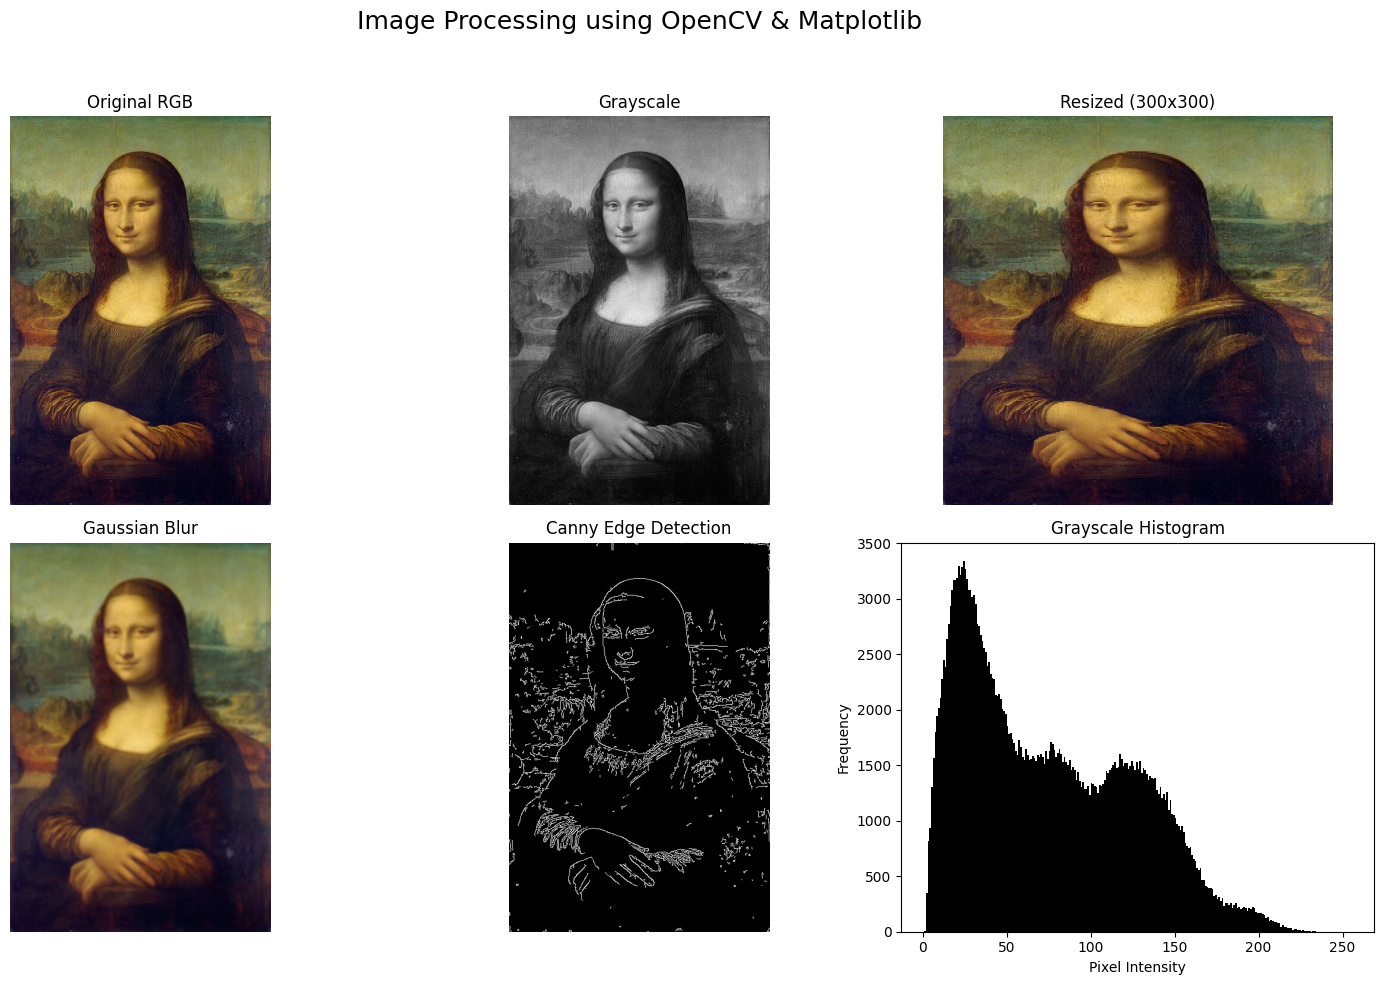

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import os


url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/440px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg'

try:
    response = urllib.request.urlopen(url)
    image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
    image_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    if image_bgr is None:
        raise ValueError("Failed to decode image.")

    print("Image successfully downloaded and decoded.")

except Exception as e:
    print(f"Error downloading image: {e}")
    image_bgr = None


if image_bgr is not None:
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(image_rgb, (300, 300))
    blurred_image = cv2.GaussianBlur(image_rgb, (9, 9), 0)
    edges = cv2.Canny(image_gray, threshold1=100, threshold2=200)

    plt.figure(figsize=(15, 10))


    plt.subplot(2, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Original RGB")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(resized_image)
    plt.title("Resized (300x300)")
    plt.axis('off')


    plt.subplot(2, 3, 4)
    plt.imshow(blurred_image)
    plt.title("Gaussian Blur")
    plt.axis('off')


    plt.subplot(2, 3, 5)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')


    plt.subplot(2, 3, 6)
    plt.hist(image_gray.ravel(), bins=256, range=(0, 256), color='black')
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.suptitle("Image Processing using OpenCV & Matplotlib", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

else:
    print("Skipping processing since image couldn't be loaded.")